### PAIR 2. TEST ESTADÍSTICOS.


----------------

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/supermarket_1.csv', index_col= 0)
df.sample(5)

,invoice_id,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_income,rating
441,394-30-3170,Mandalay,Member,Female,Sports and travel,88.43,8,35.372,742.812,3/22/2019,19:35,Credit card,707.44,35.372,4.3
55,399-46-5918,Naypyitaw,Normal,Female,Electronic accessories,85.98,8,34.392,722.232,2/28/2019,19:01,Cash,687.84,34.392,8.2
552,210-57-1719,Mandalay,Normal,Female,Health and beauty,58.24,9,26.208,550.368,2/5/2019,12:34,Cash,524.16,26.208,9.7
390,541-89-9860,Naypyitaw,Member,Female,Fashion accessories,80.48,3,12.072,253.512,2/15/2019,12:31,Cash,241.44,12.072,8.1
832,343-75-9322,Mandalay,Member,Female,Sports and travel,11.85,8,4.740,99.540,1/9/2019,16:34,Cash,94.80,4.740,4.1


1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?

H0: La variable A NO afecta a la variable B.

H1: La variable A afecta a la variable B.

- Error tipo 1: Falso positivo.
- Error tipo 2: Falso negativo.

En nuestro caso: 

- Predicción general: ¿Cuánto dinero se gastará un nuevo cliente en una compra?

H0: Que la línea de producto NO afecta al total de la factura 

H1: Que la línea de producto SÍ afecta al total de la factura

- Error tipo 1: Falso positivo. Si la empresa tiene venta más agresiva, preferiríamos este
- Error tipo 2: Falso negativo. Preferimos este error en este caso que la empresa sea cauta (que salga que NO influye aunque SÍ influya), porque si fuera al contrario invertiríamos dinero en una campaña que no es cierta.

2. ¿Qué es la asimetría?

Quiere decir que la media es mayor o menor a la mediana y a la moda.

3. ¿Es vuestra variable respuesta asimétrica?

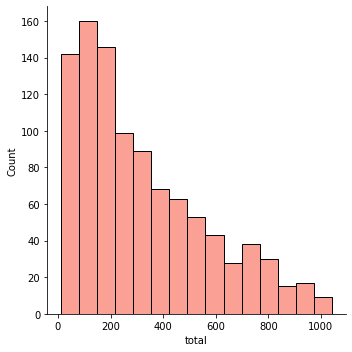

In [3]:
sns.displot(x ="total", data = df,color = "salmon")

/tmp/ipykernel_22446/852055623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df["total"], hist = False, color = "red", kde_kws = {"shade": True, "linewidth": 1});
/home/ana/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


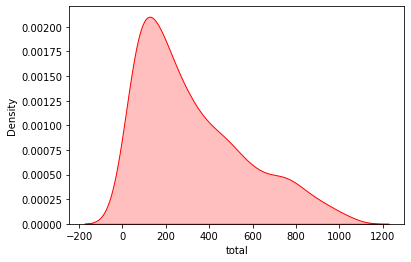

In [4]:
sns.distplot( df["total"], hist = False, color = "red", kde_kws = {"shade": True, "linewidth": 1});

In [5]:
df["total"].skew()

0.8925698049581418

Nuestra variable respuesta es asimétrica positiva puesto que está más cerca del 1 que del 0. Todo lo que se aleje de cero indica que los datos no son simétricos

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [6]:
kurtosistest(df["total"])

KurtosistestResult(statistic=-0.48186722495859124, pvalue=0.6299002701998482)

Leptocurtosis ya que el valor es mayor a 0

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

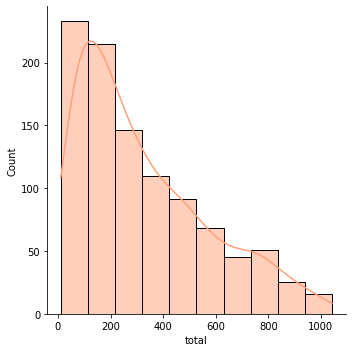

In [7]:
sns.displot(df["total"], kde = True, color = "lightsalmon", bins= 10);

In [8]:
stats.shapiro(df["total"])

ShapiroResult(statistic=0.9087592959403992, pvalue=5.303152934088987e-24)

Según el test shapiro (porque tenemos menos de 5000 registros) podemos descartar la hipotesis 0 por lo que los datos no son normales. Además, no se observa la campana de Gauss en la gráfica.